### Polynomial Regression

- Dataset: worldbank_gdp_gini_birth_death_suicide_rate.csv
- Learning Date: 26-Oct-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

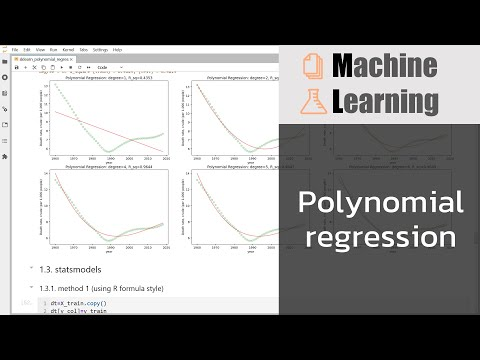

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('3ha-ART9DFA', width = 720, height = 405)

In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# load csv data from Aj. Prasert repository to a dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'

data = pd.read_csv(url)
data.sample(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
15392,World,2012,1.001199e+14,NaN,19.485813,7.717648,NaN
11105,Panama,1973,NaN,NaN,35.763000,6.841000,NaN
9711,Montenegro,1995,NaN,NaN,14.860000,8.358000,NaN
5272,Greece,1981,NaN,NaN,14.500000,8.900000,NaN
13509,Sub-Saharan Africa (IDA & IBRD countries),2017,3.944994e+12,NaN,35.667896,8.781854,NaN
11287,Peru,1978,NaN,NaN,37.249000,10.433000,NaN
13587,Sudan,1977,NaN,NaN,46.326000,13.491000,NaN
7513,Kyrgyz Republic,1980,NaN,NaN,29.600000,9.869000,NaN
10722,Not classified,2003,NaN,NaN,NaN,NaN,NaN
769,Azerbaijan,1962,NaN,NaN,45.150000,12.321000,NaN


In [5]:
data.shape

(15576, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


### filter and visualize country data

In [8]:
data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [10]:
len(data.country.unique())

264

In [11]:
data[data['country'].str.contains('Thailand')]

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


In [12]:
x_col = 'year'
y_col = 'Death rate, crude (per 1,000 people)'
country = 'Thailand'

In [16]:
df = data[data['country'] == country].copy()
df

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


In [17]:
len(df)

59

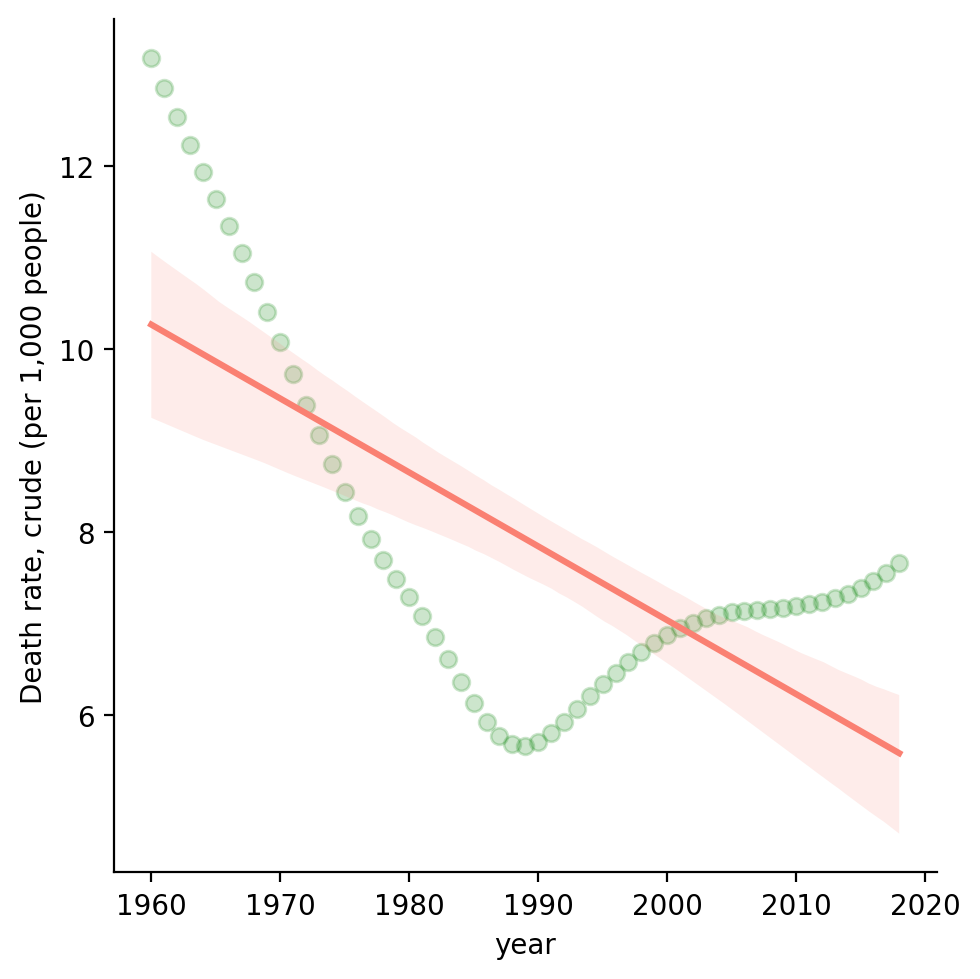

In [18]:
sns.lmplot(data = df, x = x_col, y = y_col, fit_reg = True, scatter_kws = {'alpha': .2, 'color': 'green'}, line_kws = {'color': 'salmon'})

### scikit-learn

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [20]:
df.tail(4)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
14038,Thailand,2015,1.087225e+12,36.0,10.836,7.389,14.6
14039,Thailand,2016,1.146218e+12,36.9,10.676,7.467,14.4
14040,Thailand,2017,1.205675e+12,36.5,10.513,7.559,NaN
14041,Thailand,2018,1.286309e+12,36.4,10.344,7.666,NaN


In [21]:
x_col

'year'

In [22]:
y_col

'Death rate, crude (per 1,000 people)'

In [23]:
# get X and y

X = df[[x_col]]
X.tail(4)

,year
14038,2015
14039,2016
14040,2017
14041,2018


In [25]:
y = df[y_col]
y.tail(4)

14038    7.389
14039    7.467
14040    7.559
14041    7.666
Name: Death rate, crude (per 1,000 people), dtype: float64

In [26]:
# split data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47, 1), (12, 1), (47,), (12,))

### linear regression

y = ax + b + error

In [27]:
lm = LinearRegression() # create a model
lm.fit(X_train, y_train) # train a model
lm.score(X_train, y_train) # R-Squared

0.4353052622557836

In [28]:
lm.coef_

array([-0.07661316])

In [29]:
lm.intercept_

160.27616227662955

In [30]:
lm.score(X_test, y_test)

0.5856015176097795

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

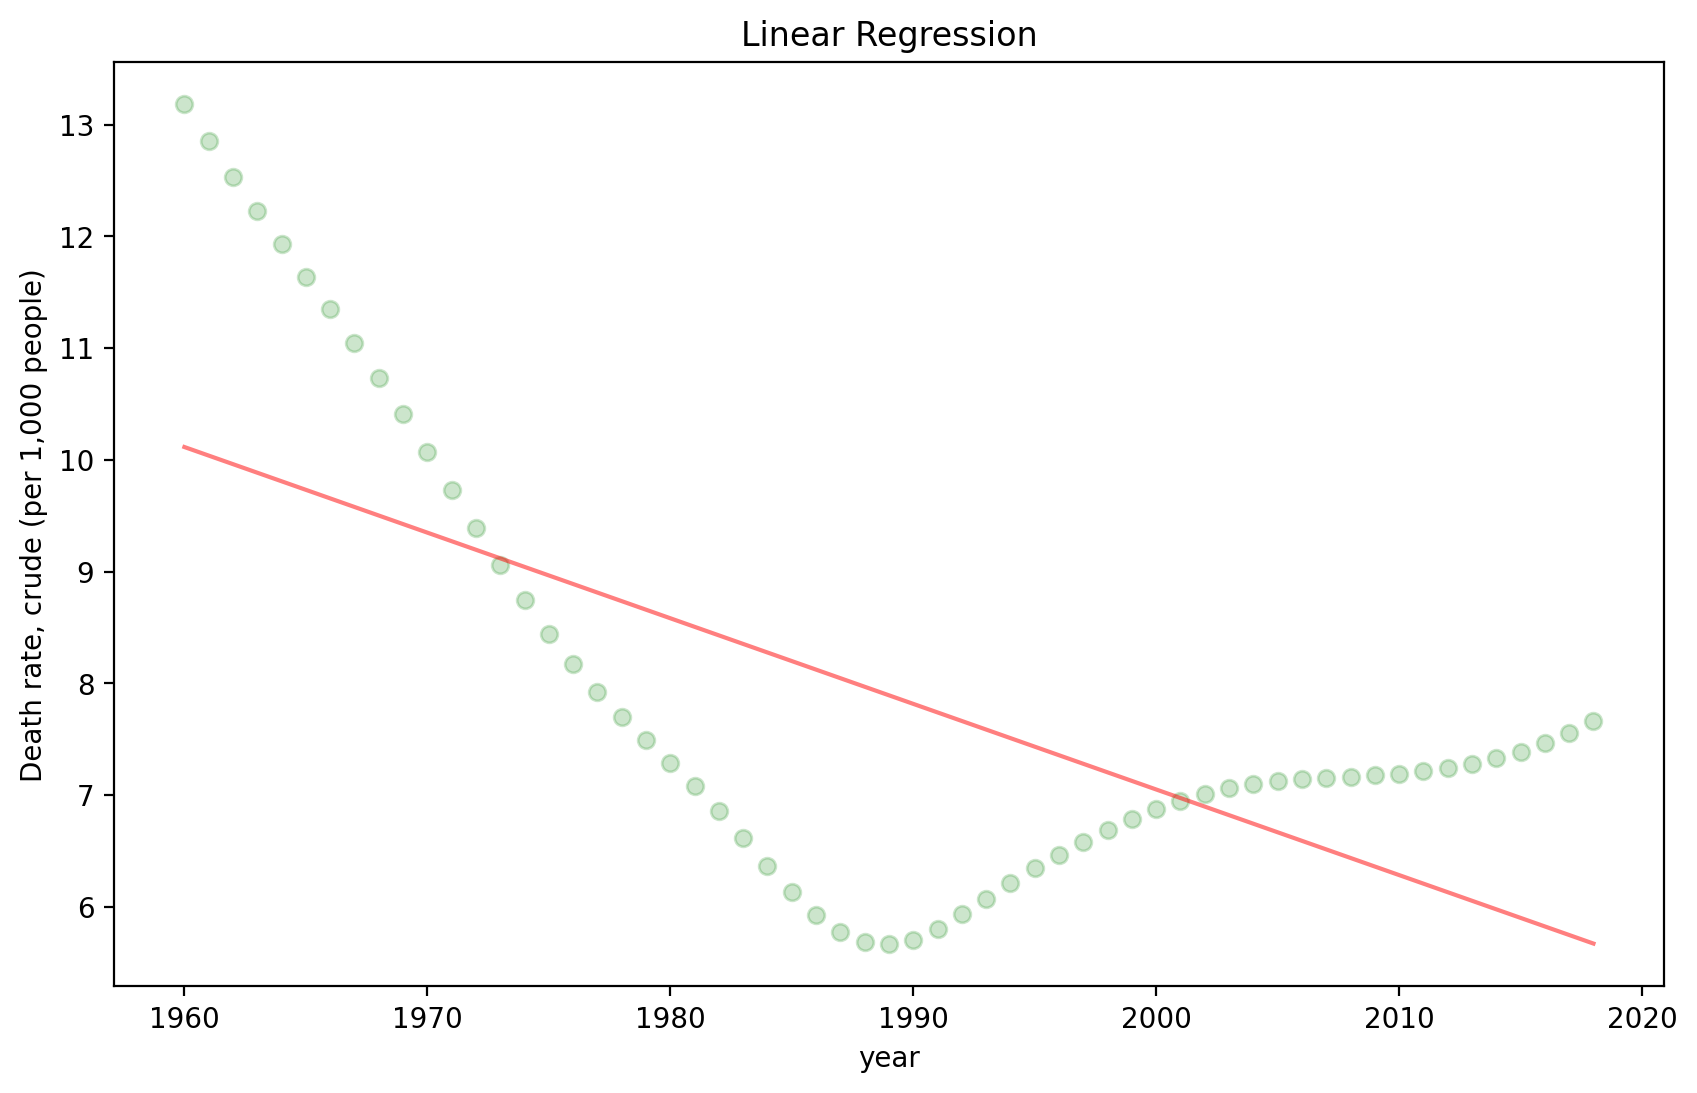

In [33]:
# plot

fig = plt.figure(figsize = (10, 6))

plt.scatter(X, y, color = 'green', alpha = .2)
plt.plot(X, lm.predict(X), color = 'red', alpha = .5)
plt.title('Linear Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [34]:
# predict

lm.predict([[1990], [2021]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.81597278, 5.44096481])

### polynomial regression

![Screenshot 2566-10-26 at 20.14.44.png](<attachment:Screenshot 2566-10-26 at 20.14.44.png>)
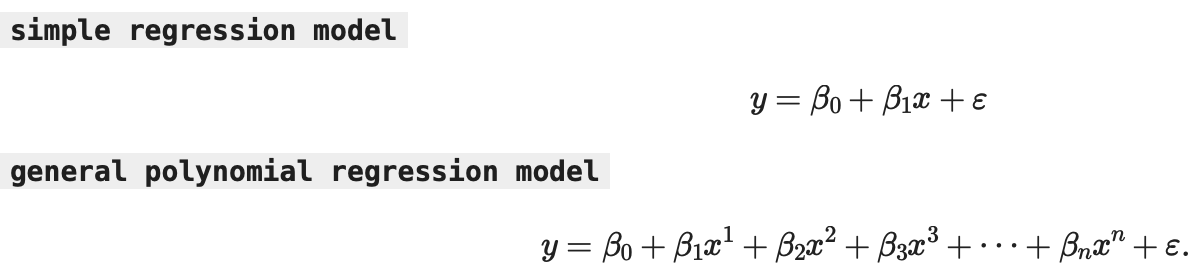

In [35]:
poly = PolynomialFeatures(degree = 2)
poly

PolynomialFeatures()

In [36]:
poly.fit_transform([[1990]]) # fit transform a dataframe

array([[1.0000e+00, 1.9900e+03, 3.9601e+06]])

In [37]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [38]:
v = 1990

v**0, v**1, v**2

(1, 1990, 3960100)